Inciso a)

Una distribucion de Bernoulli tiene una variable aleatoria que cuenta con $Exito$ o $Fracaso$, mientras que una distribucion Binomial es repetir una muestra de Bernoulli n cantidad de veces. Por lo tanto una distribucion binomial pose dos parametros:
$p$ que indica la propabilidad de exito y $n$ que indica la cantidad de repeticiones de la muestra.

In [1]:
from random import random 
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import binom 
# Puedo usar la funcion binomial de scipy

In [73]:
v_Bin = np.random.binomial(10, 0.4, 100)
# generamos 100 valores que siguen una distribucion binomial

In [74]:
len(v_Bin)
# La lista de elementos nos debe dar el numero N

100

Text(0, 0.5, 'Frecuencia')

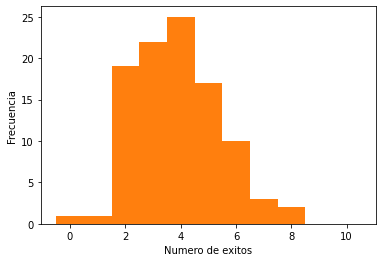

In [75]:
# Hago el histograma
plt.hist(v_Bin, bins = [i -.5 for i in range(12)] )
# Para que los bins esten centrados 
Conteo = np.array(plt.hist(v_Bin, bins = [i -.5 for i in range(12)] )[0])
plt.xlabel('Numero de exitos')
plt.ylabel('Frecuencia')

In [76]:
Conteo
# Nos da la frecuencia de cada exito, en orden seria 0, 1, 2, 3, 4, 5, 6, ,8, 9, 10
# Notar que para algunos la frecuencia es nula, con un numero mayor esto puede cambiar

array([ 1.,  1., 19., 22., 25., 17., 10.,  3.,  2.,  0.,  0.])

Text(0, 0.5, 'Frecuencia Relativa')

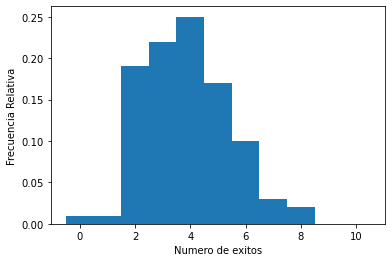

In [77]:
Frec = plt.hist(v_Bin, density = True, bins = [i -.5 for i in range(12)])
plt.xlabel('Numero de exitos')
plt.ylabel('Frecuencia Relativa')
# Frec [0] nos da la frecuencia relativa de cada exito

Creo la distribucion binomial teorica

r	p(r)
0	0.0060466176
1	0.04031078400000004
2	0.12093235199999994
3	0.21499084800000012
4	0.2508226560000002
5	0.20065812480000034
6	0.11147673600000013
7	0.04246732800000004
8	0.010616832
9	0.0015728640000000028
10	0.00010485760000000014
Media = 4.0
Varianza = 2.4


<BarContainer object of 11 artists>

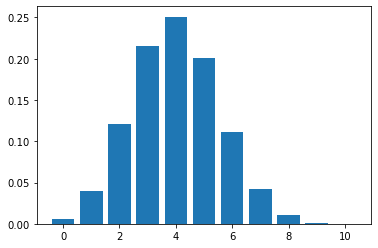

In [78]:
        n = 10
        p = 0.4
        # defino los valores de r, es el numero de exitos (de 0 a 10), seria k
        r_values = list(range(n + 1)) 
        # Asi llega hasta 10 exitos
        # Obtengo la media y la varianza 
        mu, s = binom.stats(n, p)  
        lista = [binom.pmf(r, n, p) for r in r_values ]  
        print("r\tp(r)") 
        for i in range(n + 1): 
            print(str(r_values[i]) + "\t" + str(lista[i])) 
        #    \t  nos hace un tab horizontal 
        print("Media = "+str(mu)) 
        print("Varianza = "+str(s))
        plt.bar(r_values, lista) 

Esto nos da una tabla de la probabilidad de cada numero de exitos, a diferencia de la empirica, estos valores son teoricos y no me van a cambiar si re ejecuto la funcion 

Inciso b)

El $\chi^2$, la prueba chi-cuadrado pertenece a las llamadas pruebas de bondad de ajuste o contrastes, que tienen el objetivo de decidir si puede aceptarse la hipótesis de que una muestra dada procede de una población con una distribución de probabilidad totalmente especificada en la hipótesis nula, en este caso con la distribucion teorica. El estadístico chi-cuadrado tomará un valor igual a 0 si existe concordancia perfecta entre las frecuencias observadas y las esperadas; por contra, el estadístico tomará un valor grande si existe una gran discrepancia entre estas frecuencias, y consecuentemente se deberá rechazar la hipótesis nula.

In [68]:
import scipy.stats as st 
# Antes debo pasar la frecuencia relativa teorica a un frecuencia absoluta, ==> multiplico por 100 (Numero de repeticiones)

In [79]:
Obs_Teo = np.array(lista)
# Puedo hacer opercaciones si la paso a un array

In [108]:
X = 0
for i in range(11):
    X = (Conteo[i]-(Obs_Teo*100)[i])**2/ ((Obs_Teo*100)[i]) + X
print (X)

8.443846520432022


Miro en una tabla el chi-cuadrado critico para un dado alpha y grados de libertad ( v = 10), si el estadistico calculado es mayor que el critico, se descarta la hipotesis nula, sino no se puede descartar.
Otra forma es con el valor-p, (el segundo dato que nos da el paquete) si el valor-p es menor que 0.05 se descarta la hipotesis nula (0.01 como valor critico) en caso contrario no se rechaza $Ho$.

Inciso c)

In [81]:
# dado una lista empirica de valores de distribucion binomial, quiero compararla con la teorica usando chi-cuadrado
alpha = 0.05
print(X)
f = st.chi2
f.ppf(1-alpha,df = 10)
# Los grandos de libertad son N-1 con N el numero de bines
# f.ppf nos devuelve el quantil para 1 - alpha, si mi valor X obtenido es mayor que el quantil entonces se rechaza la Ho a favor
# de la alternativa

8.443846520432022


18.307038053275146

Como vemos es menor que el X critico, no hay suficientes datos para rechazar la Hipotesis nula

Inciso d)


El valor-p se obtiene usando la funcion acumulada de la restas de las frecuencias observadas y la teorica.
Otra forma es tambien usar la funcion de python de antes que la calcula, igualmente busco hacerla de forma manual como alternativa.

In [82]:
p = 1 - f.cdf(X, 10)
print(p)

0.5855669222865889


NOTA: Si la distribucion no posee valores nulos, se puede usar la funcion de python chi2_contingency que calcula el valor de chi2, valor-p y un array de las frecuencia relativas.

Inciso e)

In [84]:
mus = np.arange(2,7,0.1)
std = 2.5

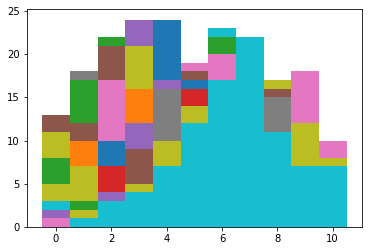

In [97]:
Gauss = []
for i in range(len(mus)):
    x = st.norm.rvs(loc = mus [i], scale = std, size = 100)
    Counts = np.array(plt.hist(x, bins = [i -.5 for i in range(12)] )[0])
    Gauss.append(Counts)

In [100]:
# Vemos un ejemplo
Gauss[0]

array([13., 16., 15., 17., 12.,  7.,  2.,  3.,  1.,  0.,  1.])

Calculo el chi2:

In [102]:
len(mus)

50

In [101]:
len(Gauss)

50

In [119]:
Xs = []
for i in range(len(Gauss)):
    X = 0
    for k in range(11):
        X = (Gauss[i][k]-(Obs_Teo*100)[k])**2/ ((Obs_Teo*100)[k]) + X
        Xs.append(X)

In [122]:
# Xs?

In [123]:
P = []
for i in range(len(Xs)):
    p = 1 - f.cdf(Xs[i], 10)
    P.append(p)

In [125]:
# P?